In [1]:
# mengimport seluruh library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
# agar file bisa dibaca notebook google
day_df = pd.read_csv('D:/submission/data/day.csv')

In [3]:
# Load isi data day_csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Data wrangling
print('Jumlah duplikat data harian :', day_df.duplicated().sum())
print('Missing value harian: ', day_df.isna().sum())

Jumlah duplikat data harian : 0
Missing value harian:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Menilai data day_csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# konversi dteday dari object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Exploratory Data Analisys
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [9]:
# Demografi berdasarkan season
# diketahui jumlah sewa minimal perhari adalah 22 dan maksimal 8714
# season: Musim dalam bentuk angka (1 = musim semi, 2 = musim panas, 3 = musim gugur, 4 = musim dingin)
day_df.groupby(by='season').agg({
    'casual':  ['max', 'min', 'mean', 'std'],
    'registered':  ['max', 'min', 'mean', 'std'],
    'cnt': ['max', 'min', 'mean', 'std']
})

casual                               registered                    \
          max  min         mean         std        max  min         mean   
season                                                                     
1        3155    9   334.928177  387.655561       5315  416  2269.204420   
2        3410  120  1106.097826  737.590829       6456  674  3886.233696   
3        3160  118  1202.611702  595.975032       6917  889  4441.691489   
4        3031    2   729.112360  606.318118       6946   20  3999.050562   

                      cnt                                  
                std   max   min         mean          std  
season                                                     
1       1200.269751  7836   431  2604.132597  1399.942119  
2       1353.375628  8362   795  4992.331522  1695.977235  
3       1304.626949  8714  1115  5644.303191  1459.800381  
4       1444.782557  8555    22  4728.162921  1699.615261

In [10]:
# Demografi berdasarkan bulan
# 1 = January, 2 = February, dst ... 12 = December
day_df.groupby(by='mnth').agg({
    'casual':  ['max', 'min', 'mean', 'std'],
    'registered':  ['max', 'min', 'mean', 'std'],
    'cnt': ['max', 'min', 'mean', 'std']
})

casual                               registered                     \
        max  min         mean         std        max   min         mean   
mnth                                                                      
1      1070    9   194.225806  197.384490       4185   416  1982.112903   
2      1435   47   262.508772  232.283549       4546   905  2392.789474   
3      3155   46   716.838710  624.308094       5893   491  2975.419355   
4      3252  120  1013.366667  738.345585       5950   674  3471.533333   
5      3410  255  1214.274194  754.950311       6433  2213  4135.500000   
6      2963  477  1231.766667  664.017647       6456  2993  4540.600000   
7      3065  562  1260.596774  598.382778       6790  2298  4303.080645   
8      2827  226  1161.919355  466.576274       6541   889  4502.500000   
9      3160  118  1172.050000  738.378375       6946  1689  4594.466667   
10     3031    2   963.870968  703.205576       6911    20  4235.354839   
11     2290   69   610.050000  470.933096       5520   935  3637.133333   
12     1153    9   349.887097  222.634531       6055   432  3053.919355   

                    cnt                                  
              std   max   min         mean          std  
mnth                                                     
1     1053.274474  4521   431  2176.338710  1161.674370  
2     1091.126003  5062  1005  2655.298246  1145.313307  
3     1513.254354  8362   605  3692.258065  1899.301812  
4     1414.571151  7460   795  4484.900000  1776.160778  
5     1093.179612  8294  2633  5349.774194  1298.711561  
6     1012.958885  8120  3767  5772.366667  1240.400031  
7     1190.542490  8173  3285  5563.677419  1273.751871  
8     1335.126601  7865  1115  5664.419355  1494.516146  
9     1547.716749  8714  1842  5766.516667  1810.130649  
10    1685.022519  8156    22  5199.225806  1988.392517  
11    1219.589045  6852  1495  4247.183333  1285.712709  
12    1465.052959  6606   441  3403.806452  1549.639353

In [11]:
# Demografi berdasarkan holiday -> 0 = Not Holiday, 1 = Holiday
day_df.groupby(by='holiday').agg({
    'casual':  ['max', 'min', 'mean', 'std'],
    'registered':  ['max', 'min', 'mean', 'std'],
    'cnt': ['max', 'min', 'mean', 'std']
})

casual                               registered                    \
           max  min         mean         std        max  min         mean   
holiday                                                                     
0         3410    2   841.771831  680.528529       6946   20  3685.332394   
1         3065  117  1064.714286  860.046809       5172  573  2670.285714   

                       cnt                                  
                 std   max   min         mean          std  
holiday                                                     
0        1553.704431  8714    22  4527.104225  1929.013947  
1        1492.860246  7403  1000  3735.000000  2103.350660

In [12]:
# Demografi berdasarkan weekday -> 0=Ahad, 1=Senin, 2=Selasa, 3=Rabu, 4=Kamis, 5=Jumat, 6=Sabtu
day_df.groupby(by='weekday').agg({
    'casual':  ['max', 'min', 'mean', 'std'],
    'registered':  ['max', 'min', 'mean', 'std'],
    'cnt': ['max', 'min', 'mean', 'std']
})

casual                              registered                     \
           max min         mean         std        max   min         mean   
weekday                                                                     
0         3283  54  1338.295238  809.324777       5657   451  2890.533333   
1         3065   2   674.133333  493.777298       6435    20  3663.990476   
2         1348   9   556.182692  342.748705       6697   573  3954.480769   
3         2562   9   551.144231  401.808954       6946   432  3997.394231   
4         1405  15   590.961538  371.680307       6781   416  4076.298077   
5         2469  38   752.288462  483.422400       6917  1129  3938.000000   
6         3410  57  1465.257143  927.082884       5966   570  3085.285714   

                       cnt                                  
                 std   max   min         mean          std  
weekday                                                     
0        1179.713036  8227   605  4228.828571  1872.496629  
1        1504.215925  7525    22  4338.123810  1793.074013  
2        1549.462149  7767   683  4510.663462  1826.911642  
3        1723.710208  8173   441  4548.538462  2038.095884  
4        1642.753330  7804   431  4667.259615  1939.433317  
5        1494.998698  8362  1167  4690.288462  1874.624870  
6        1358.068784  8714   627  4550.542857  2196.693009

In [13]:
# Demografi berdasarkan workingday -> 0=not working day, 1=working day
day_df.groupby(by='workingday').agg({
    'casual':  ['max', 'min', 'mean', 'std'],
    'registered':  ['max', 'min', 'mean', 'std'],
    'cnt': ['max', 'min', 'mean', 'std']
})

casual                              registered                    \
              max min         mean         std        max  min         mean   
workingday                                                                    
0            3410  54  1371.134199  873.064794       5966  451  2959.034632   
1            2469   2   606.570000  391.496032       6946   20  3978.250000   

                          cnt                                 
                    std   max  min         mean          std  
workingday                                                    
0           1293.867686  8714  605  4330.168831  2052.141245  
1           1568.692453  8362   22  4584.820000  1878.415583

Koefisien antara cnt dan season = 0.40610037079863526


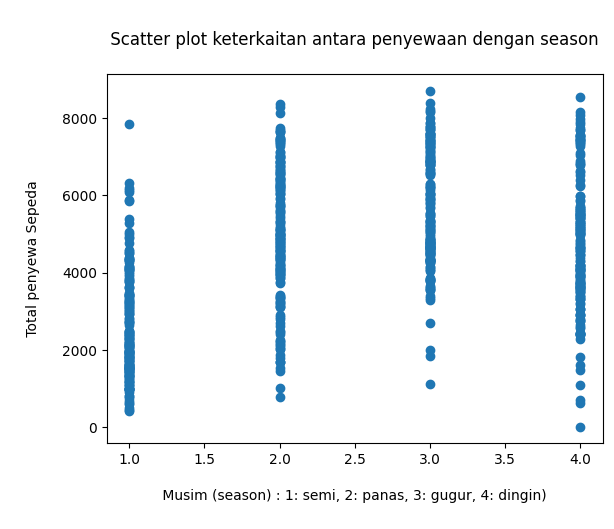

In [14]:
# cek keterkaitan antara cnt dengan season, temp, atemp, hum, windspeed

# cek keterkaitan antara kolom cnt dengan kolom season
# Hitung koefisien korelasi antara 'cnt' dan 'season'
corre_cnt_temp = day_df[['cnt', 'season']].corr()
corre_value = corre_cnt_temp.loc['cnt', 'season']
print(f'Koefisien antara cnt dan season = {corre_value}')  

# hasilnya 0.40610037079863526, tidak ada pengaruh antara season dengan sewa

# Grafik scatter plot
plt.scatter(day_df['season'], day_df['cnt'])
plt.ylabel('\n Total penyewa Sepeda \n')
plt.xlabel('\n Musim (season) : 1: semi, 2: panas, 3: gugur, 4: dingin) \n')
plt.title('\n Scatter plot keterkaitan antara penyewaan dengan season \n')
plt.show()


Koefisien antara cnt dan temp = 0.6274940090334915


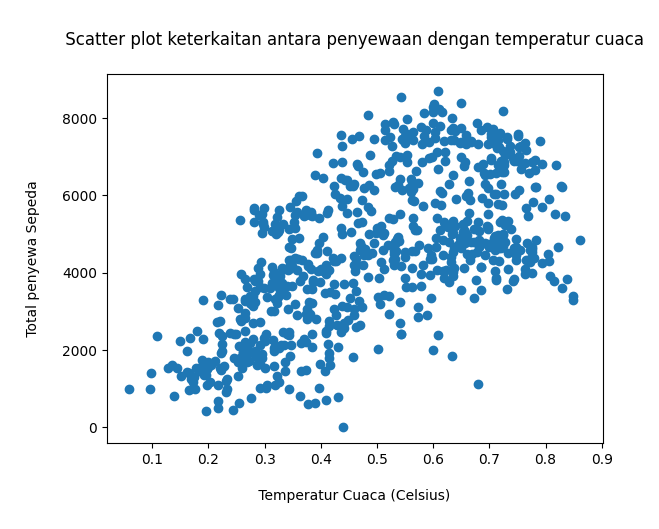

In [15]:
# cek keterkaitan antara cnt dengan season, temp, atemp, hum, windspeed

# cek keterkaitan antara kolom cnt dengan kolom temp
# Hitung koefisien korelasi antara 'cnt' dan 'temp'
corre_cnt_temp = day_df[['cnt', 'temp']].corr()
corre_value = corre_cnt_temp.loc['cnt', 'temp']
print(f'Koefisien antara cnt dan temp = {corre_value}')  

# hasilnya 0.6274940090334915, jadi kurang kuat pengaruh antara temp dengan sewa

# Grafik scatter plot
plt.scatter(day_df['temp'], day_df['cnt'])
plt.ylabel('\n Total penyewa Sepeda \n')
plt.xlabel('\n Temperatur Cuaca (Celsius) \n')
plt.title('\n Scatter plot keterkaitan antara penyewaan dengan temperatur cuaca \n')
plt.show()

Koefisien antara cnt dan atemp = 0.6310656998491827


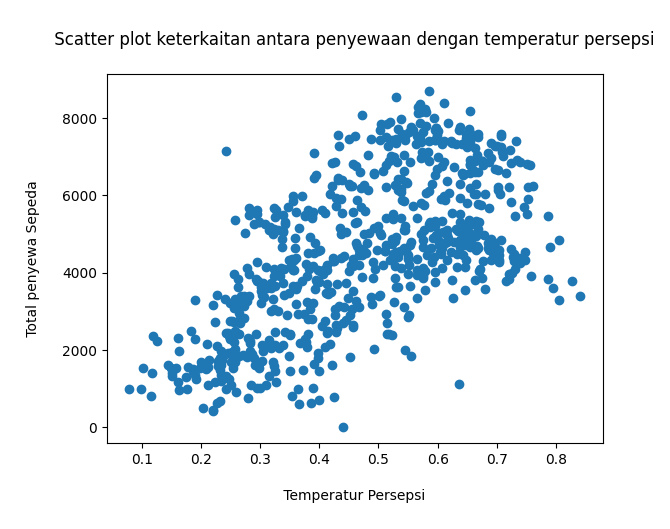

In [16]:
# cek keterkaitan antara cnt dengan atemp
corre_cnt_atemp = day_df[['cnt', 'atemp']].corr()
corre_value = corre_cnt_atemp.loc['cnt', 'atemp']
print(f'Koefisien antara cnt dan atemp = {corre_value}')  

# hasilnya 0.6310656998491827, jadi kurang kuat pengaruh antara atemp dengan sewa

#Grafik scatter plot
plt.scatter(day_df['atemp'], day_df['cnt'])
plt.ylabel('\n Total penyewa Sepeda \n')
plt.xlabel('\n Temperatur Persepsi \n')
plt.title('\n Scatter plot keterkaitan antara penyewaan dengan temperatur persepsi \n')
plt.show()

Koefisien antara cnt dan hum = -0.1006585621371548


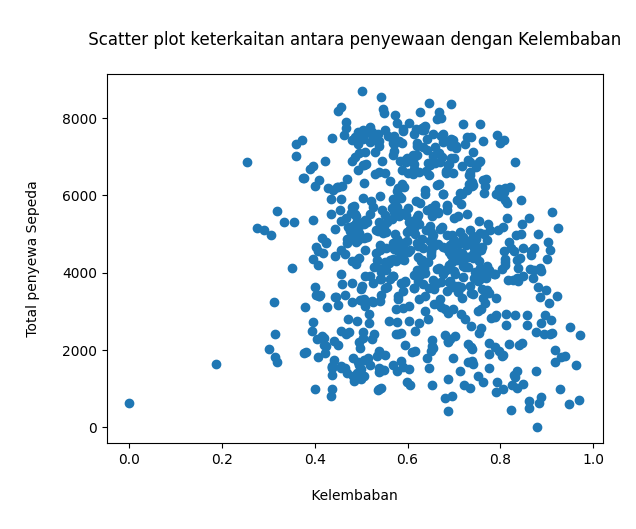

In [17]:
# cek keterkaitan antara cnt dengan hum
corre_cnt_hum = day_df[['cnt', 'hum']].corr()
corre_value = corre_cnt_hum.loc['cnt', 'hum']
print(f'Koefisien antara cnt dan hum = {corre_value}')  

# hasilnya -0.1006585621371548, jadi tidak ada hubungan antara hum dengan sewa

#Grafik scatter plot
plt.scatter(day_df['hum'], day_df['cnt'])
plt.ylabel('\n Total penyewa Sepeda \n')
plt.xlabel('\n Kelembaban \n')
plt.title('\n Scatter plot keterkaitan antara penyewaan dengan Kelembaban \n')
plt.show()

Koefisien antara cnt dengan windspeed = {-0.2345449974216706}


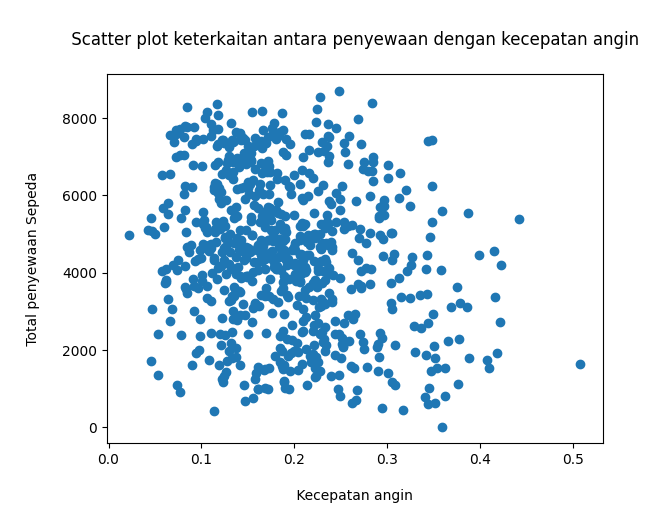

In [18]:
# cek keterkaitan antara cnt dengan windspeed
corre_cnt_windspeed = day_df[['cnt', 'windspeed']].corr()
corre_value = corre_cnt_windspeed.loc['cnt', 'windspeed']
print(f'Koefisien antara cnt dengan windspeed =', {corre_value})    

# hasilnya -0.2345449974216706, jadi tidak ada hubungan antara windspeed dengan sewa (cnt)

#Grafik scatter plot
plt.scatter(day_df['windspeed'], day_df['cnt'])
plt.ylabel('\n Total penyewaan Sepeda \n')
plt.xlabel('\n Kecepatan angin \n')
plt.title('\n Scatter plot keterkaitan antara penyewaan dengan kecepatan angin \n')
plt.show()

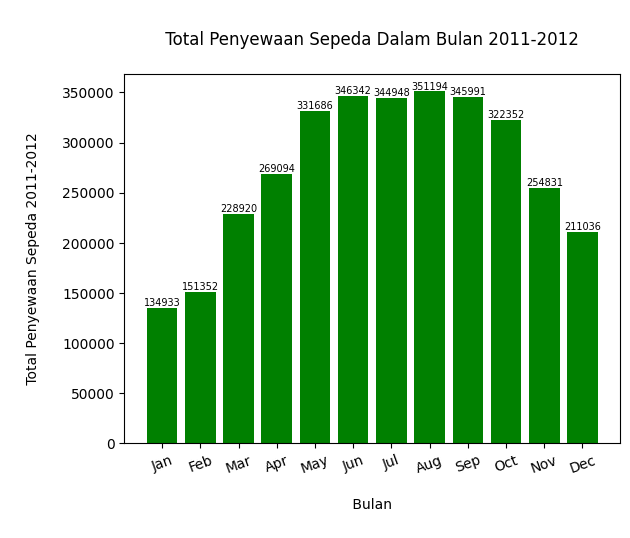

In [19]:
# Bar chart antara total penyewa(cnt) berdasarkan Bulan

# Membuat DataFrame baru untuk menghitung total penyewaan dalam bulan
total_sewa_per_bln = day_df.groupby('mnth')['cnt'].sum()

# Membuat bar chart
fig, ax = plt.subplots()
bars = ax.bar(total_sewa_per_bln.index, total_sewa_per_bln, color='green')
ax.set_title("\n Total Penyewaan Sepeda Dalam Bulan 2011-2012 \n")
ax.set_xlabel("\n Bulan \n")
ax.set_ylabel("\n Total Penyewaan Sepeda 2011-2012 \n")

# Mengganti label pada sumbu x
ax.set_xticks(total_sewa_per_bln.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xticks(rotation=20, ha='center')

# Menambahkan label pada setiap bar
plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=7)

# Tampilan Bar chart
plt.show()

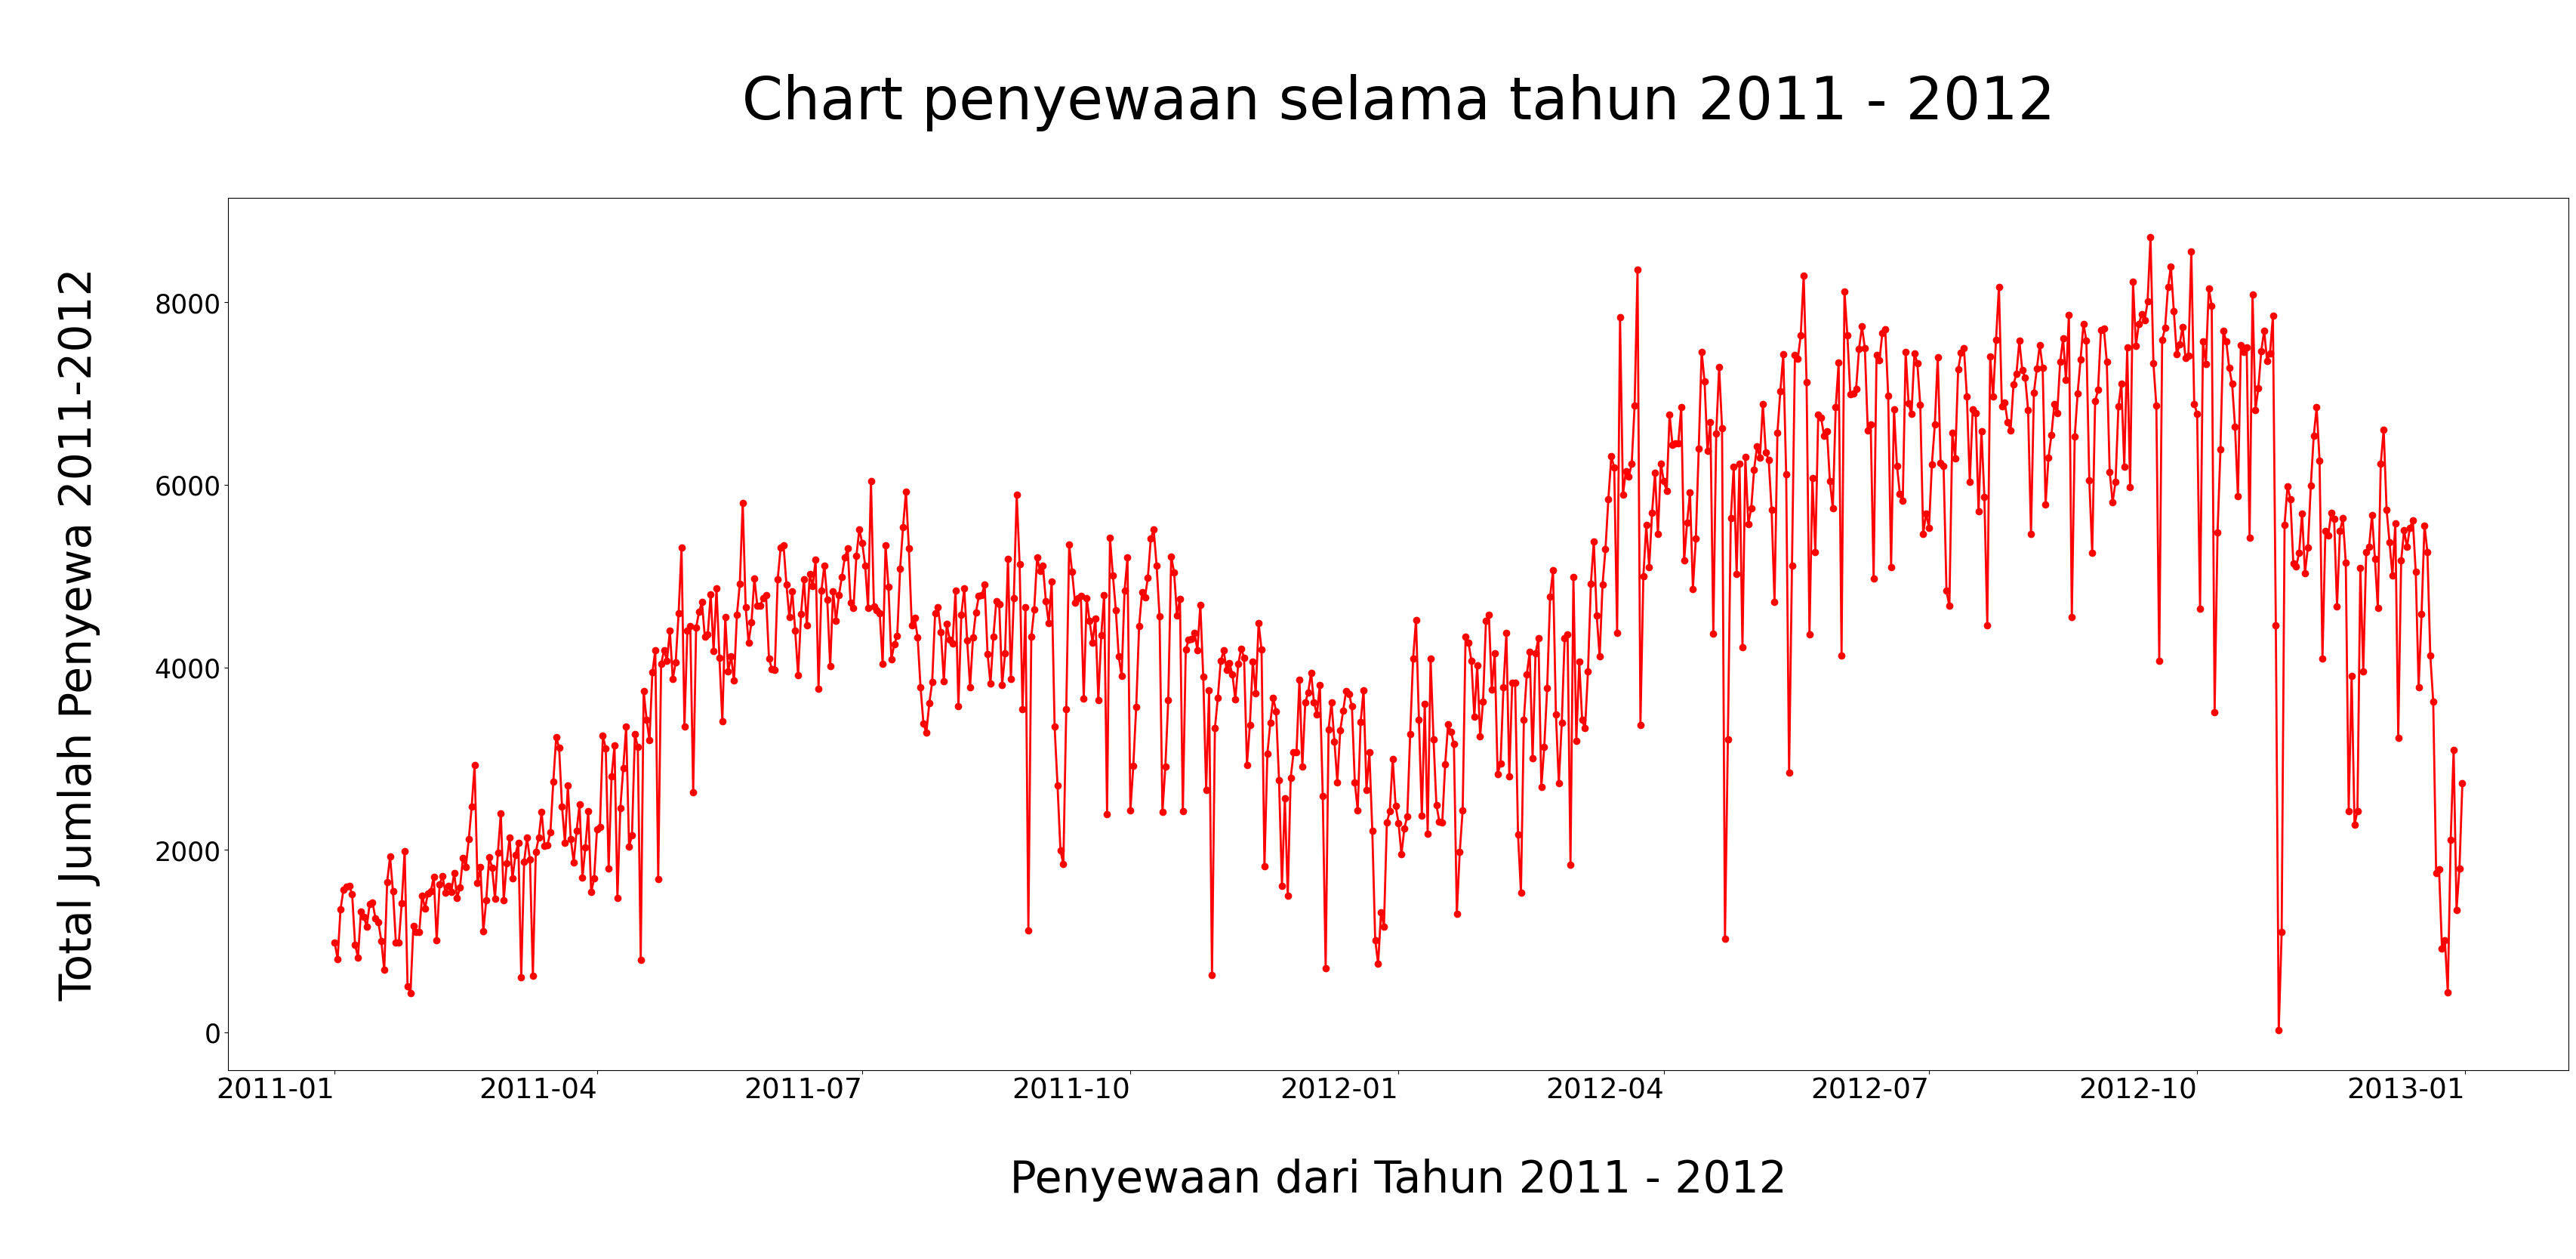

In [20]:
# Grafik Chart antara total penyewa(cnt) selama 2011 - 2012

sewa_bln_cnt = day_df.groupby('mnth')['cnt'].sum()

# Membuat grafik
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(
    day_df['dteday'],
    day_df['cnt'],
    marker='o',
    linewidth=2,
    color='red'
)
ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=27)

plt.xticks(rotation=0, ha='right')

ax.set_title('\n Chart penyewaan selama tahun 2011 - 2012 \n', fontsize=56)
ax.set_xlabel('\n Penyewaan dari Tahun 2011 - 2012 \n', fontsize=42)
ax.set_ylabel('\n Total Jumlah Penyewa 2011-2012 \n', fontsize=42)

plt.show(fig)

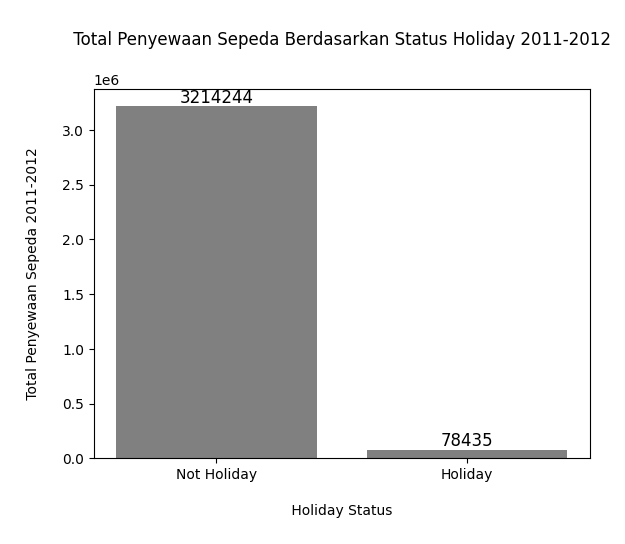

In [21]:
# Bar chart antara total penyewa(cnt) saat holiday

# Membuat DataFrame baru untuk menghitung total penyewaan berdasarkan status holiday
total_sewa_per_holiday = day_df.groupby('holiday')['cnt'].sum()

# Membuat bar chart
fig, ax = plt.subplots()
bars = ax.bar(total_sewa_per_holiday.index, total_sewa_per_holiday, color='grey')
ax.set_title("\n Total Penyewaan Sepeda Berdasarkan Status Holiday 2011-2012 \n")
ax.set_xlabel("\n Holiday Status \n")
ax.set_ylabel("\n Total Penyewaan Sepeda 2011-2012 \n")

# Mengganti label pada sumbu x
ax.set_xticks(total_sewa_per_holiday.index)
ax.set_xticklabels(['Not Holiday', 'Holiday'])

# Menambahkan label pada setiap bar
plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=12)

# Tampilan Bar chart
plt.show()

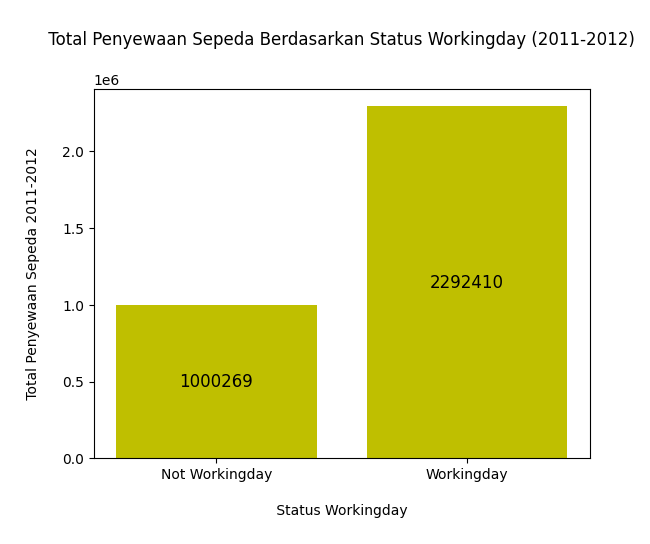

In [22]:
# Bar chart antara total penyewa(cnt) saat working day

# Membuat DataFrame baru untuk menghitung total penyewaan berdasarkan status working day
total_sewa_per_workingday = day_df.groupby('workingday')['cnt'].sum()

# Membuat bar chart
fig, ax = plt.subplots()
bars = ax.bar(total_sewa_per_workingday.index, total_sewa_per_workingday, color='y')
ax.set_title("\n Total Penyewaan Sepeda Berdasarkan Status Workingday (2011-2012) \n")
ax.set_xlabel("\n Status Workingday \n")
ax.set_ylabel("\n Total Penyewaan Sepeda 2011-2012 \n")

# Mengganti label pada sumbu x
ax.set_xticks(total_sewa_per_workingday.index)
ax.set_xticklabels(['Not Workingday', 'Workingday'])

# Menambahkan label pada setiap bar
plt.bar_label(bars, fmt='%d', label_type='center', fontsize=12)

# Tampilan Bar chart
plt.show()

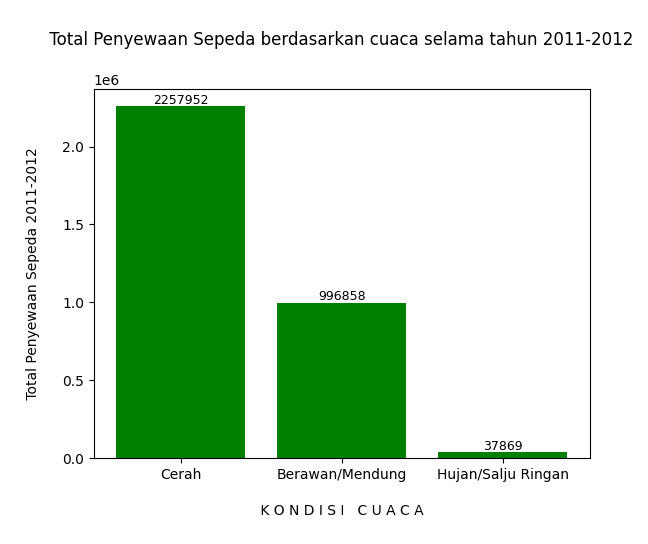

In [23]:
# Bar chart antara total penyewa(cnt) dalam kaitannya dengan weathersit
# Membuat DataFrame baru untuk menghitung total penyewaan dalam kaitannya dengan weathersit
# 1 = Cerah, 2 = Berawan/Mendung, 3 = Hujan/Salju Ringan
total_sewa_per_weathersit = day_df.groupby('weathersit')['cnt'].sum()

# Membuat bar chart
fig, ax = plt.subplots()
bars = ax.bar(total_sewa_per_weathersit.index, total_sewa_per_weathersit, color='g')
ax.set_title("\n Total Penyewaan Sepeda berdasarkan cuaca selama tahun 2011-2012 \n")
ax.set_xlabel("\n K O N D I S I   C U A C A \n")
ax.set_ylabel("\n Total Penyewaan Sepeda 2011-2012 \n")

# Mengganti label pada sumbu x
ax.set_xticks(total_sewa_per_weathersit.index)
ax.set_xticklabels(['Cerah', 'Berawan/Mendung', 'Hujan/Salju Ringan'])

# Menambahkan label pada setiap bar
plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=9)

# Tampilan Bar chart
plt.show()

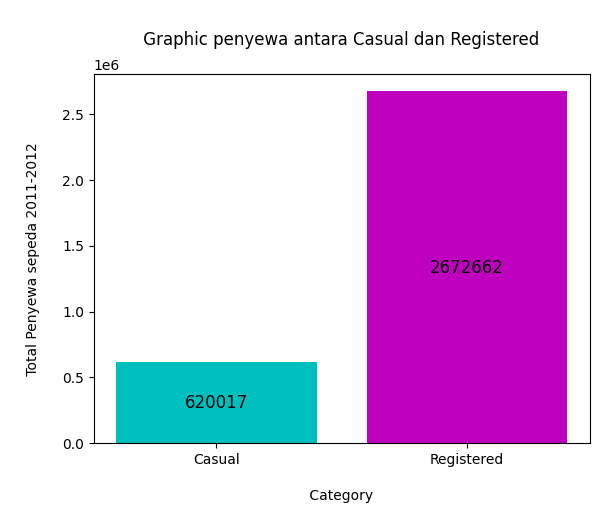

In [24]:
# Bar chart perbandingan antara casual dengan registered

# Membuat DataFrame baru untuk menghitung perbandingan casual dan registered dalam total penyewaan
# Menghitung total casual dan total registered
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Menggabungkan total_casual dan total_registered menjadi satu DataFrame
total_df = pd.DataFrame({'Category': ['Casual', 'Registered'], 'Total': [total_casual, total_registered]})

# Membuat bar chart
fig, ax = plt.subplots()
bar_width = 0.35

bars = ax.bar(total_df['Category'], total_df['Total'], color=['c', 'm'])

ax.set_title("\n Graphic penyewa antara Casual dan Registered \n")
ax.set_xlabel("\n Category \n")
ax.set_ylabel("\n Total Penyewa sepeda 2011-2012 \n")

# Menambahkan label pada setiap bar
plt.bar_label(bars, fmt='%d', label_type='center', fontsize=12)

# Tampilan Bar chart
plt.show()

In [25]:
# Menghapus kolom yang tidak diperlukan

clean_df =  pd.DataFrame(day_df)
coloumn_dihapus = ['instant', 'season', 'temp', 'atemp', 'hum', 'windspeed']
clean_df = clean_df.drop(coloumn_dihapus, axis=1)

clean_df.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,0,1,0,6,0,2,331,654,985
1,2011-01-02,0,1,0,0,0,2,131,670,801
2,2011-01-03,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,0,1,0,3,1,1,82,1518,1600


In [26]:
# mengubah dteday dari object menjadi datetime
clean_df['dteday'] = pd.to_datetime(clean_df['dteday'])

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   yr          731 non-null    int64         
 2   mnth        731 non-null    int64         
 3   holiday     731 non-null    int64         
 4   weekday     731 non-null    int64         
 5   workingday  731 non-null    int64         
 6   weathersit  731 non-null    int64         
 7   casual      731 non-null    int64         
 8   registered  731 non-null    int64         
 9   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 57.2 KB


In [27]:
# Menyimpan hasil dari pembersihan kolom yang tidak diperlukan
clean_df.to_csv('D:/submission/dashboard/clean.csv')